In [123]:
# For reference   

 # info_dict = {
    #     "game_id": unique_game_id,
    #     "transcript": game_state,
    #     "result": result,
    #     "player_one": player_one_title,
    #     "player_two": player_two_title,
    #     "player_one_score": player_one_score,
    #     "player_two_score": player_two_score,
    #     "player_one_illegal_moves": player_one_illegal_moves,
    #     "player_two_illegal_moves": player_two_illegal_moves,
    #     "player_one_resignation": player_one_resignation,
    #     "player_two_resignation": player_two_resignation,
    #     "game_title": f"{player_one_title} vs. {player_two_title}",
    #     "number_of_moves": board.fullmove_number,
    #     "time_taken": total_time,
    # }

game_title
babbage vs. Stockfish 0                   0.000000
babbage vs. Stockfish 1                   0.000000
babbage vs. Stockfish 2                   0.000000
babbage vs. Stockfish 3                   0.000000
babbage vs. Stockfish 4                   0.000000
davinci vs. Stockfish 0                   0.000000
davinci vs. Stockfish 1                   0.000000
davinci vs. Stockfish 2                   0.000000
davinci vs. Stockfish 3                   0.000000
davinci vs. Stockfish 4                   0.000000
gpt-3.5-turbo vs. Stockfish 0             0.000000
gpt-3.5-turbo vs. Stockfish 1             0.000000
gpt-3.5-turbo vs. Stockfish 2             0.000000
gpt-3.5-turbo vs. Stockfish 3             0.000000
gpt-3.5-turbo vs. Stockfish 4             0.000000
gpt-3.5-turbo-instruct vs. Stockfish 0    1.000000
gpt-3.5-turbo-instruct vs. Stockfish 1    0.866667
gpt-3.5-turbo-instruct vs. Stockfish 2    0.666667
gpt-3.5-turbo-instruct vs. Stockfish 3    0.461538
gpt-3.5-turbo-instru

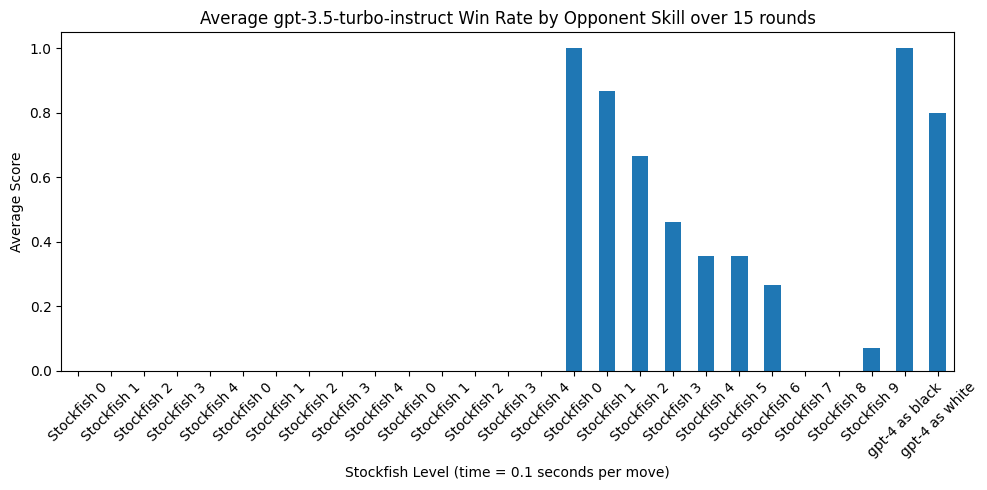

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

def graph_player_gpt_score(player: str, df: pd.DataFrame) -> None:
    if player != "player_one" and player != "player_two":
        raise ValueError("player must be either 'player_one' or 'player_two'")
    
    # Convert the player_one_score column to numeric type (if it's not already)
    df[f"{player}_score"] = pd.to_numeric(df[f"{player}_score"], errors="coerce")

    # Compute average score of player_one grouped by game_title
    average_scores = df.groupby("game_title")[f"{player}_score"].mean()

    # Display the result
    print(average_scores)

    average_scores.index = average_scores.index.str.split(' vs. ').str[1].str.strip()

    # Everything above is pretty general. Everything below is a quick bodge I did to make the graph
    # to account for the fact that GPT-4 is player one in one case
    ### BEGIN BODGE ###

    if 'gpt-3.5-turbo-instruct' in average_scores.index:
        average_scores = average_scores.drop('gpt-3.5-turbo-instruct')

    # Check if 'gpt-4' exists in the index and change it to 'gpt-4 as black'
    if 'gpt-4' in average_scores.index:
        average_scores.rename(index={'gpt-4': 'gpt-4 as black'}, inplace=True)

    # Filter data for games between gpt-4 and gpt-3.5-turbo-instruct
    filtered_df = df[(df['player_one'] == 'gpt-4') & (df['player_two'] == 'gpt-3.5-turbo-instruct')]

    # Convert to numeric safely
    filtered_df.loc[:, f"player_two_score"] = pd.to_numeric(filtered_df[f"player_two_score"], errors="coerce")


    # Number of games played
    total_games = len(filtered_df)

    wins_for_gpt_3_5 = filtered_df["player_two_score"].sum()

    # Calculate win rate
    win_rate = wins_for_gpt_3_5 / total_games


    print(f"Win rate of gpt-3.5-turbo-instruct against gpt-4: {win_rate * 100:.2f}%")

    # Create a new Series with win_rate
    label = f"gpt-4 as white"
    new_entry = pd.Series([win_rate], index=[label])

    # Append to average_scores using concat
    average_scores = pd.concat([average_scores, new_entry])

    ### END BODGE ###


    average_scores.plot(kind="bar", figsize=(10, 5))
    plt.title(f"Average gpt-3.5-turbo-instruct Win Rate by Opponent Skill over 15 rounds")
    plt.ylabel("Average Score")
    plt.xlabel("Stockfish Level (time = 0.1 seconds per move)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.show()
    plt.savefig("gpt-3.5-turbo-instruct-win-rate.png")

df = pd.read_csv("logs/games.csv")

graph_player_gpt_score("player_one", df)


In [138]:
import pandas as pd
def analyze_move_history(df: pd.DataFrame, model: str, player: str) -> None:
    if player != "player_one" and player != "player_two":
        raise ValueError("player must be either 'player_one' or 'player_two'")

    # Filter the DataFrame for games where player title is model
    filtered_df = df[df[player] == model]

    # Compute total illegal moves and total moves
    total_illegal_moves = filtered_df[f"{player}_illegal_moves"].sum()
    total_moves = filtered_df['number_of_moves'].sum()

    print(f"\n{model} Stats\n")

    # Calculate the ratio
    ratio = total_illegal_moves / total_moves
    print(f"total moves: {total_moves}, total illegal moves: {total_illegal_moves}")
    # Display the result
    print(f"Ratio of Player One's Illegal Moves to Total Moves: {ratio:.4f}")

    # Other stats
    min_moves = filtered_df['number_of_moves'].min()
    max_moves = filtered_df['number_of_moves'].max()
    median_moves = filtered_df['number_of_moves'].median()
    std_dev_moves = filtered_df['number_of_moves'].std()

    
    print(f"Minimum Moves: {min_moves}")
    print(f"Maximum Moves: {max_moves}")
    print(f"Median Moves: {median_moves}")
    print(f"Standard Deviation of Moves: {std_dev_moves:.2f}")

# Load the CSV file into a DataFrame
    df = pd.read_csv("logs/games.csv")

analyze_move_history(df, "gpt-3.5-turbo-instruct", "player_one")
analyze_move_history(df, "gpt-4", "player_one")
analyze_move_history(df, "gpt-3.5-turbo", "player_one")
analyze_move_history(df, "babbage", "player_one")
analyze_move_history(df, "davinci", "player_one")
analyze_move_history(df, "replicate/meta/llama-2-7b:527827021d8756c7ab79fde0abbfaac885c37a3ed5fe23c7465093f0878d55ef", "player_one")
analyze_move_history(df, "replicate/meta/llama-2-70b:a52e56fee2269a78c9279800ec88898cecb6c8f1df22a6483132bea266648f00", "player_one")


gpt-3.5-turbo-instruct Stats

total moves: 8230, total illegal moves: 25
Ratio of Player One's Illegal Moves to Total Moves: 0.0030
Minimum Moves: 15
Maximum Moves: 147
Median Moves: 45.0
Standard Deviation of Moves: 21.92

gpt-4 Stats

total moves: 604, total illegal moves: 77
Ratio of Player One's Illegal Moves to Total Moves: 0.1275
Minimum Moves: 23
Maximum Moves: 65
Median Moves: 44.0
Standard Deviation of Moves: 14.47

gpt-3.5-turbo Stats

total moves: 185, total illegal moves: 186
Ratio of Player One's Illegal Moves to Total Moves: 1.0054
Minimum Moves: 4
Maximum Moves: 11
Median Moves: 8.0
Standard Deviation of Moves: 2.20

babbage Stats

total moves: 309, total illegal moves: 213
Ratio of Player One's Illegal Moves to Total Moves: 0.6893
Minimum Moves: 6
Maximum Moves: 27
Median Moves: 12.0
Standard Deviation of Moves: 4.65

davinci Stats

total moves: 465, total illegal moves: 199
Ratio of Player One's Illegal Moves to Total Moves: 0.4280
Minimum Moves: 5
Maximum Moves: 31
M

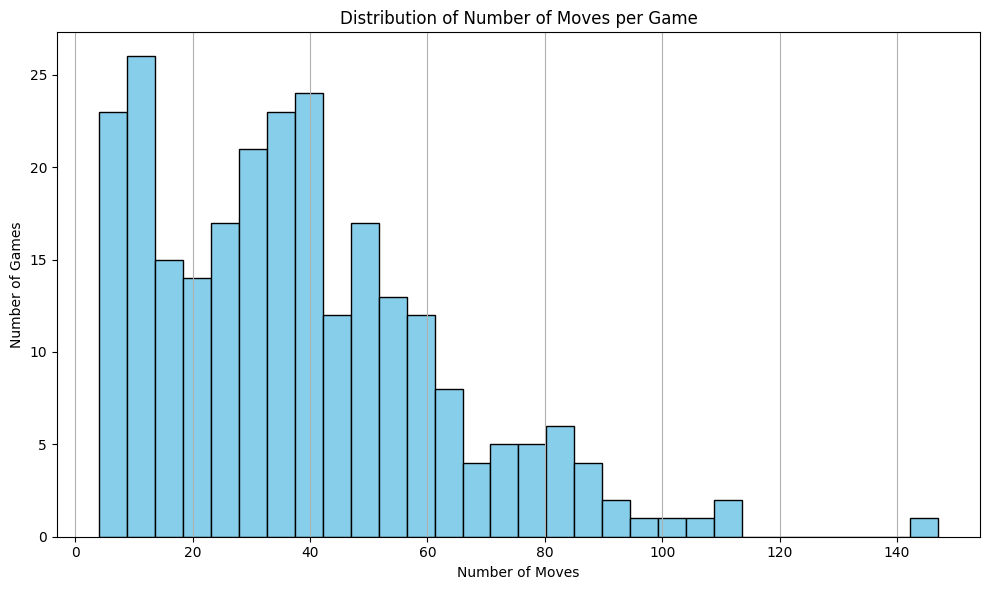

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv("logs/games.csv")

# Histogram for distribution of number of moves per game
plt.figure(figsize=(10,6))
df['number_of_moves'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Number of Moves per Game')
plt.xlabel('Number of Moves')
plt.ylabel('Number of Games')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [127]:
# Group by player_two_title and count the occurrences
title_counts = df.groupby('game_title').size()

print(title_counts)

# Filter titles with a count less than 30
# titles_less_than_30 = title_counts[title_counts < 30]

# # Display the result
# print(titles_less_than_30)

game_title
babbage vs. Stockfish 0                    5
babbage vs. Stockfish 1                    5
babbage vs. Stockfish 2                    5
babbage vs. Stockfish 3                    5
babbage vs. Stockfish 4                    5
davinci vs. Stockfish 0                    5
davinci vs. Stockfish 1                    5
davinci vs. Stockfish 2                    5
davinci vs. Stockfish 3                    5
davinci vs. Stockfish 4                    5
gpt-3.5-turbo vs. Stockfish 0              5
gpt-3.5-turbo vs. Stockfish 1              5
gpt-3.5-turbo vs. Stockfish 2              5
gpt-3.5-turbo vs. Stockfish 3              5
gpt-3.5-turbo vs. Stockfish 4              5
gpt-3.5-turbo-instruct vs. Stockfish 0    16
gpt-3.5-turbo-instruct vs. Stockfish 1    15
gpt-3.5-turbo-instruct vs. Stockfish 2    15
gpt-3.5-turbo-instruct vs. Stockfish 3    15
gpt-3.5-turbo-instruct vs. Stockfish 4    15
gpt-3.5-turbo-instruct vs. Stockfish 5    15
gpt-3.5-turbo-instruct vs. Stockfish 6    15

In [128]:
df = pd.read_csv("logs/games.csv")
filtered_game = df[
    (df['player_one'] == "gpt-3.5-turbo-instruct") &
    (df['player_two'] == "Stockfish 9") & 
    (df['player_one_score'] != "0")
]

print(filtered_game)

             game_id                                         transcript  \
136  1695413352-1107  [Event "FIDE World Championship Match 2024"]\n...   
146  1695413660-1489  [Event "FIDE World Championship Match 2024"]\n...   

      result              player_one   player_two player_one_score  \
136  1/2-1/2  gpt-3.5-turbo-instruct  Stockfish 9              1/2   
146      1-0  gpt-3.5-turbo-instruct  Stockfish 9                1   

    player_two_score  player_one_illegal_moves  player_two_illegal_moves  \
136              1/2                         0                         0   
146                0                         0                         0   

     player_one_resignation  player_two_resignation  \
136                   False                   False   
146                   False                   False   

     player_one_failed_to_find_legal_move  \
136                                 False   
146                                 False   

     player_two_failed_to_find_l

In [139]:
df = pd.read_csv("logs/games.csv")
filtered_game = df[
    (df['player_one'] == "gpt-3.5-turbo-instruct") &
    (df['player_one_illegal_moves'] > 0)
]

print(filtered_game)

             game_id                                         transcript  \
0    1695410287-2414  [Event "FIDE World Championship Match 2024"]\n...   
77   1695411920-1540  [Event "FIDE World Championship Match 2024"]\n...   
130  1695413213-5860  [Event "FIDE World Championship Match 2024"]\n...   
133  1695413269-1742  [Event "FIDE World Championship Match 2024"]\n...   
325  1695588801-2764  [White "Magnus Carlsen"]\n[Black "Stockfish"]\...   

    result              player_one   player_two player_one_score  \
0      1-0  gpt-3.5-turbo-instruct  Stockfish 0                1   
77     0-1  gpt-3.5-turbo-instruct  Stockfish 5                0   
130    0-1  gpt-3.5-turbo-instruct  Stockfish 8                0   
133    0-1  gpt-3.5-turbo-instruct  Stockfish 8                0   
325    0-1  gpt-3.5-turbo-instruct  Stockfish 5                0   

    player_two_score  player_one_illegal_moves  player_two_illegal_moves  \
0                  0                        10                  